# INFO-F422 -  Statistical Foundations of Machine Learning Project 

### Talhaoui Yassin - __[yassin.talhaoui@ulb.be](mailto:yassin.talhaoui@ulb.be)__
### Oumahi Abdelmoumen - __[abdelmoumen.oumahi@ulb.be](mailto:abdelmoumen.oumahi@ulb.be)__

## Richter's Predictor: Modeling Earthquake Damage

## Placement of the seed and the different packages that will be used

In [2]:
set.seed(123)

In [ ]:
install.packages("caret")
install.packages("tidyverse")
install.packages("corrplot")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("matrixStats")
install.packages("MLmetrics")

In [3]:
library(caret)
library(tidyverse)
library(corrplot)
library(rpart)
library(rpart.plot)
library(matrixStats)
library(MLmetrics)

Le chargement a n'ecessit'e le package : ggplot2

Le chargement a n'ecessit'e le package : lattice

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.1     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.92 loaded


Attachement du package : 'matrixStats'


L'objet suivant est masqu'e depuis 'package:dplyr':

    count



Attachement du package : 'MLmetrics'


Les objets suivants sont masqu'es depuis 'package:caret':

    MAE, RMSE


L'objet suivant est masqu'e depuis 'package:base':

    Recall




## QUESTION 1

Update : During the preprocessing we will apply the same modification to the train and test dataset because for the following questions it will impose us in general the name of the variable will be the same as for the train except that we will add a T (to indicate that it concerns the test dataset)

Loading of different datasets and first overview of the data

In [4]:
train <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Values.csv")
label <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Train_Labels.csv")
test <- read.csv("Richters_Predictor_Modeling_Earthquake_Damage_-_Test_Values.csv")
trainMerged <- inner_join(train, label, by='building_id')
dim(train)
dim(label)
dim(test)
dim(trainMerged)

[1] 260601     39

[1] 260601      2

[1] 86868    39

[1] 260601     40

The dimensions are in accordance with the one stated on the DivenData website

In [5]:
head(train)
head(trainMerged)
head(label)

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
2,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
3,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
5,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0
6,333020,8,558,6089,2,10,9,5,t,r,...,1,0,0,0,0,0,0,0,0,0


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
2,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
3,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
4,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
5,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
6,333020,8,558,6089,2,10,9,5,t,r,...,0,0,0,0,0,0,0,0,0,2


,building_id,damage_grade
,<int>,<int>
1,802906,3
2,28830,2
3,94947,3
4,590882,2
5,201944,3
6,333020,2


In [ ]:
summary(train)
summary(label)
summary(test)

And by using the summary() function of R, we can affirm that there is no missing value.

Here the objective is to try to reduce the impact of extreme values of some variables. For example the variable "age" contains some very high values (building which are almost 1000 years old), in order to avoid that it impacts the accuracy of our tasks. We will reduce them by replacing them by limit values (Winsorization)

Count_floors_pre_eq

In [6]:
iqr <- IQR(trainMerged$count_floors_pre_eq)
factor <- 3
limit <- median(trainMerged$count_floors_pre_eq) + factor * iqr
trainMerged$count_floors_pre_eq[trainMerged$count_floors_pre_eq > limit] <- limit

iqr <- IQR(test$count_floors_pre_eq)
factor <- 3
limit <- median(test$count_floors_pre_eq) + factor * iqr
test$count_floors_pre_eq[test$count_floors_pre_eq > limit] <- limit

In [ ]:
hist(trainMerged$count_floors_pre_eq)
table(trainMerged$count_floors_pre_eq)

Age

In [7]:
iqr <- IQR(trainMerged$age)
factor <- 3
limit <- median(trainMerged$age) + factor * iqr
trainMerged$age[trainMerged$age > limit] <- limit

iqr <- IQR(test$age)
factor <- 3
limit <- median(test$age) + factor * iqr
test$age[test$age > limit] <- limit

In [ ]:
hist(trainMerged$age)
table(trainMerged$age)


Area_percentage

In [8]:
iqr <- IQR(trainMerged$area_percentage)
factor <- 3
limit <- median(trainMerged$area_percentage) + factor * iqr
trainMerged$area_percentage[trainMerged$area_percentage > limit] <- limit

iqr <- IQR(test$area_percentage)
factor <- 3
limit <- median(test$area_percentage) + factor * iqr
test$area_percentage[test$area_percentage > limit] <- limit

In [ ]:
hist(trainMerged$area_percentage)
table(trainMerged$area_percentage)

Height_percentage

In [9]:
iqr <- IQR(trainMerged$height_percentage)
factor <- 1.5
limit <- median(trainMerged$height_percentage) + factor * iqr
trainMerged$height_percentage[trainMerged$height_percentage > limit] <- limit

iqr <- IQR(test$height_percentage)
factor <- 1.5
limit <- median(test$height_percentage) + factor * iqr
test$height_percentage[test$height_percentage > limit] <- limit

In [ ]:
hist(trainMerged$height_percentage)
table(trainMerged$height_percentage)

Count_families

In [10]:
iqr <- IQR(trainMerged$count_families)
factor <- 1.5
limit <- median(trainMerged$count_families) + factor * iqr
trainMerged$count_families[trainMerged$count_families > limit] <- limit

iqr <- IQR(test$count_families)
factor <- 1.5
limit <- median(test$count_families) + factor * iqr
test$count_families[test$count_families > limit] <- limit

In [ ]:
hist(trainMerged$count_families)
table(trainMerged$count_families)

Next step we have a number of variables that are categorical, this may be bad for the steps that follow so we will use the one hot encoding to make them numeric.

Step 1: we detect the variables to modify

In [11]:
character_variables_bool<-sapply(trainMerged[1,],class)=="character"
character_variables_boolT<-sapply(test[1,],class)=="character"
character_variables_bool

building_id                         geo_level_1_id 
                                 FALSE                                  FALSE 
                        geo_level_2_id                         geo_level_3_id 
                                 FALSE                                  FALSE 
                   count_floors_pre_eq                                    age 
                                 FALSE                                  FALSE 
                       area_percentage                      height_percentage 
                                 FALSE                                  FALSE 
                land_surface_condition                        foundation_type 
                                  TRUE                                   TRUE 
                             roof_type                      ground_floor_type 
                                  TRUE                                   TRUE 
                      other_floor_type                               position 
                                  TRUE                                   TRUE 
                    plan_configuration           has_superstructure_adobe_mud 
                                  TRUE                                  FALSE 
   has_superstructure_mud_mortar_stone          has_superstructure_stone_flag 
                                 FALSE                                  FALSE 
has_superstructure_cement_mortar_stone    has_superstructure_mud_mortar_brick 
                                 FALSE                                  FALSE 
has_superstructure_cement_mortar_brick              has_superstructure_timber 
                                 FALSE                                  FALSE 
             has_superstructure_bamboo   has_superstructure_rc_non_engineered 
                                 FALSE                                  FALSE 
      has_superstructure_rc_engineered               has_superstructure_other 
                                 FALSE                                  FALSE 
                legal_ownership_status                         count_families 
                                  TRUE                                  FALSE 
                     has_secondary_use          has_secondary_use_agriculture 
                                 FALSE                                  FALSE 
               has_secondary_use_hotel               has_secondary_use_rental 
                                 FALSE                                  FALSE 
         has_secondary_use_institution               has_secondary_use_school 
                                 FALSE                                  FALSE 
            has_secondary_use_industry          has_secondary_use_health_post 
                                 FALSE                                  FALSE 
          has_secondary_use_gov_office           has_secondary_use_use_police 
                                 FALSE                                  FALSE 
               has_secondary_use_other                           damage_grade 
                                 FALSE                                  FALSE

In [12]:
character_variables <- which(sapply(trainMerged[1,],class)=="character")
character_variablesT <- which(sapply(test[1,],class)=="character")
character_variables
length(character_variables)

land_surface_condition        foundation_type              roof_type 
                     9                     10                     11 
     ground_floor_type       other_floor_type               position 
                    12                     13                     14 
    plan_configuration legal_ownership_status 
                    15                     27

[1] 8

In [13]:
data_preprocessed<-trainMerged[,-character_variables]
data_preprocessedT<-test[,-character_variablesT]
dim(data_preprocessed)


[1] 260601     32

In [ ]:
head(data_preprocessed)

In [14]:
data_normalise <- scale(data_preprocessed[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id" )])
data_normaliseT <- scale(data_preprocessedT[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id" )])


In [15]:
data_preprocessed[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id")] <- data_normalise[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id" )]
data_preprocessedT[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id")] <- data_normaliseT[, c("geo_level_1_id", "geo_level_2_id", "geo_level_3_id" )]

In [ ]:
head(data_preprocessed)

Step 2: We apply the one hot encoding for these variables

In [16]:
cols_to_transform <- c("land_surface_condition", "foundation_type", "roof_type",
                       "ground_floor_type", "other_floor_type", "position", 
                       "plan_configuration", "legal_ownership_status")

one_hot_trans <- dummyVars(formula = ~ ., data = trainMerged[, cols_to_transform])

data_one_hot <- data.frame(predict(one_hot_trans, newdata = trainMerged))

In [17]:
cols_to_transformT <- c("land_surface_condition", "foundation_type", "roof_type",
                       "ground_floor_type", "other_floor_type", "position", 
                       "plan_configuration", "legal_ownership_status")

one_hot_transT <- dummyVars(formula = ~ ., data = test[, cols_to_transformT])

data_one_hotT <- data.frame(predict(one_hot_transT, newdata = test))

Step 3 : We merge our modified varibale with our dataset in order to obtain a table with only numeric values

In [18]:
trainCleaned <- cbind(data_preprocessed, data_one_hot)
trainCleanedT <- cbind(data_preprocessedT, data_one_hotT)
head(trainCleaned)


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configurationm,plan_configurationn,plan_configurationo,plan_configurationq,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusv,legal_ownership_statusw
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,802906,-0.9834118,-0.5187039,1.6290515,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
2,28830,-0.7344579,0.4819970,-0.9450156,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
3,94947,0.8837423,-0.8191565,0.7446102,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,590882,1.0082192,-0.6858913,1.2165864,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
5,201944,-0.3610271,-1.3812936,-1.3081165,2,30,8,8,1,0,...,0,0,0,0,0,0,0,0,1,0
6,333020,-0.7344579,-0.3466706,-0.0463135,2,10,9,5,0,1,...,0,0,0,0,0,0,0,0,1,0


Moreover, we remove the building_id varibles which will not bring anything during the following steps.

In [19]:
trainCleaned <- trainCleaned %>% relocate(damage_grade, .after = legal_ownership_statusw)
trainCleaned <- select(trainCleaned, -c(building_id))
trainCleanedT <- select(trainCleanedT, -c(building_id))
head(trainCleaned)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configurationn,plan_configurationo,plan_configurationq,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusv,legal_ownership_statusw,damage_grade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.9834118,-0.5187039,1.6290515,2,30,6,5,1,1,0,...,0,0,0,0,0,0,0,1,0,3
2,-0.7344579,0.4819970,-0.9450156,2,10,8,7,0,1,0,...,0,0,0,0,0,0,0,1,0,2
3,0.8837423,-0.8191565,0.7446102,2,10,5,5,0,1,0,...,0,0,0,0,0,0,0,1,0,3
4,1.0082192,-0.6858913,1.2165864,2,10,6,5,0,1,0,...,0,0,0,0,0,0,0,1,0,2
5,-0.3610271,-1.3812936,-1.3081165,2,30,8,8,1,0,0,...,0,0,0,0,0,0,0,1,0,3
6,-0.7344579,-0.3466706,-0.0463135,2,10,9,5,0,1,0,...,0,0,0,0,0,0,0,1,0,2


In order to have a first vision of the correlation between the variables we set up a correlation matrix.

In [20]:
numeric_data = c()
for (i in 1:ncol(trainCleaned)) {
    if (class(trainCleaned[, i]) != "character") {
        numeric_data <- append(numeric_data, i)
    }
}
cormat <- abs(cor(trainCleaned[, numeric_data]))
cormat

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configurationn,plan_configurationo,plan_configurationq,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusv,legal_ownership_statusw,damage_grade
geo_level_1_id,1.0000000000,0.0614048534,0.0027184451,0.1109811320,0.047254857,0.066744160,0.0749745389,0.018245465,0.152037764,0.0076772072,...,8.222888e-04,0.0081792905,0.0093826688,0.0085588975,0.0330521678,0.1003929898,0.0078735782,0.0820548764,0.0046460055,0.072346634
geo_level_2_id,0.0614048534,1.0000000000,0.0009210931,0.0410805603,0.031531869,0.039899529,0.0385702127,0.015832855,0.076491325,0.0087428232,...,4.151702e-04,0.0057857317,0.0043257875,0.0059284248,0.0255317097,0.0258932511,0.0270114837,0.0231892461,0.0135791615,0.043160757
geo_level_3_id,0.0027184451,0.0009210931,1.0000000000,0.0084718933,0.006303267,0.004083808,0.0185617772,0.015732164,0.026294351,0.0195789298,...,3.123084e-03,0.0028035078,0.0018949999,0.0033985366,0.0032398945,0.0341990799,0.0013094153,0.0185331138,0.0130999509,0.007931779
count_floors_pre_eq,0.1109811320,0.0410805603,0.0084718933,1.0000000000,0.173843296,0.050425836,0.6277704778,0.068826552,0.204379130,0.0085311469,...,7.872794e-04,0.0048608371,0.0497166509,0.0027085921,0.0301012707,0.0972693393,0.0250799492,0.0797932308,0.0079277459,0.137381378
age,0.0472548568,0.0315318687,0.0063032673,0.1738432963,1.000000000,0.028199789,0.2078606518,0.205273547,0.035490258,0.0107234241,...,2.344991e-03,0.0003816959,0.0148621917,0.0052148631,0.0128945102,0.0850105671,0.0001595599,0.0569515747,0.0144714096,0.153339609
area_percentage,0.0667441604,0.0398995295,0.0040838083,0.0504258362,0.028199789,1.000000000,0.1953243490,0.033860475,0.227149949,0.0011090877,...,2.579424e-03,0.0260175307,0.0166290177,0.0201812988,0.0992829378,0.0313130099,0.0186556730,0.0325607629,0.0024607117,0.128231354
height_percentage,0.0749745389,0.0385702127,0.0185617772,0.6277704778,0.207860652,0.195324349,1.0000000000,0.157218496,0.035731909,0.0183844591,...,1.665183e-03,0.0033387299,0.0219589151,0.0003233412,0.0005518607,0.0889136194,0.0124799573,0.0715128724,0.0021523050,0.085304688
has_superstructure_adobe_mud,0.0182454652,0.0158328554,0.0157321636,0.0688265517,0.205273547,0.033860475,0.1572184959,1.000000000,0.306861168,0.0069617504,...,1.530135e-03,0.0027853664,0.0173120256,0.0053125257,0.0190196841,0.0301759065,0.0251080746,0.0046808661,0.0331649780,0.055313602
has_superstructure_mud_mortar_stone,0.1520377636,0.0764913251,0.0262943509,0.2043791305,0.035490258,0.227149949,0.0357319091,0.306861168,1.000000000,0.0340455999,...,3.467759e-05,0.0208515104,0.0509111924,0.0174759834,0.0985564267,0.1387459777,0.0478715860,0.1266407426,0.0037261188,0.291325239
has_superstructure_stone_flag,0.0076772072,0.0087428232,0.0195789298,0.0085311469,0.010723424,0.001109088,0.0183844591,0.006961750,0.034045600,1.0000000000,...,5.316792e-04,0.0055826154,0.0117625293,0.0035426230,0.0095558954,0.0083835268,0.0049394746,0.0055453273,0.0052446171,0.066039449


Graphical view of our correlation matrix 

In [ ]:
cormat <- abs(cor(trainCleaned))
corrplot(cormat, tl.cex = 0.1, method = "color")


The large number of variables makes the matrix and the graph not very readable (even if the graph gives us some points of strong correlation)
We will now, from a preprocessing perspective, remove all variables for which the correlation factor is > 0.5 and then we will keep the best feature between the two.
For this we calculate the best feature is the feature for which the correlation with our target feature (damage_grade) is the highest.

Then we will remove them from our dataset. One of the other reasons is that by leaving all the variables present in our dataset, the too big number will systematically lead to an error because of the too big load of the operation (limit of technique of my computer I think)

In [21]:
to_delete_DG = c()
for (i in 1:(nrow(cormat)-1)) {
    for (j in i:(nrow(cormat)-1)) {
        if (cormat[i,j] > 0.6 &  i!=j) {
            if (abs(cormat[i,69]) < abs(cormat[j,69])) {
                to_delete_DG <- c(to_delete_DG, i)
            } else {
                to_delete_DG <- c(to_delete_DG, j)
            }
        }
    }
}
to_delete_DG <- to_delete_DG[!duplicated(to_delete_DG)]
to_delete_DG


[1]  7 47 21 31 35 49 40 41 42 45 53 62 67

In [23]:
trainCleanedD <- select(trainCleaned,-c(to_delete_DG))
head(trainCleanedD)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configurationf,plan_configurationm,plan_configurationn,plan_configurationo,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusw,damage_grade
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-0.9834118,-0.5187039,1.6290515,2,30,6,1,1,0,0,...,0,0,0,0,0,0,0,0,0,3
2,-0.7344579,0.4819970,-0.9450156,2,10,8,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0.8837423,-0.8191565,0.7446102,2,10,5,0,1,0,0,...,0,0,0,0,0,0,0,0,0,3
4,1.0082192,-0.6858913,1.2165864,2,10,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
5,-0.3610271,-1.3812936,-1.3081165,2,30,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,-0.7344579,-0.3466706,-0.0463135,2,10,9,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [24]:
trainCleanedDT <- select(trainCleanedT,-c(to_delete_DG))
head(trainCleanedDT)

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,...,plan_configurationd,plan_configurationf,plan_configurationm,plan_configurationn,plan_configurationo,plan_configurations,plan_configurationu,legal_ownership_statusa,legal_ownership_statusr,legal_ownership_statusw
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.3875425,-0.2615809,1.3827458,2,20,7,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,-0.9823929,-1.3623056,1.5691129,2,25,13,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0102404,-1.6574450,1.0365963,2,5,4,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1.5083988,-1.6090615,-1.5426699,1,0,19,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,0.3875425,-1.0042677,0.4681765,2,15,8,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1.0102404,-1.2921495,-0.6119306,1,55,4,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


The previous steps concern feature engineering and data verification, now we will move to the feature selection step.

We are going to use methods known as filtering as stated in the tp of the course they are methods of preprocessing. 

They seek to evaluate the benefits of data features without considering the effects of the selected feature subset on the performance of the learning algorithm. These methods select variables by ordering them using compression techniques such as principal component analysis (PCA) or by computing their correlation or a more advanced similarity measure such as minimum redundancy and maximum relevance (mRMR) to the output.

We will use the last two methods to make our feature selection

Concerning the script of the "Correlation with the output" and "mRMR" we use the same as the TP 5 of the courses 

In [27]:
X<-trainCleanedD[,setdiff(colnames(trainCleanedD),"damage_grade")]
Y<-trainCleanedD[,"damage_grade"]
N <-nrow(X)
n <-ncol(X)

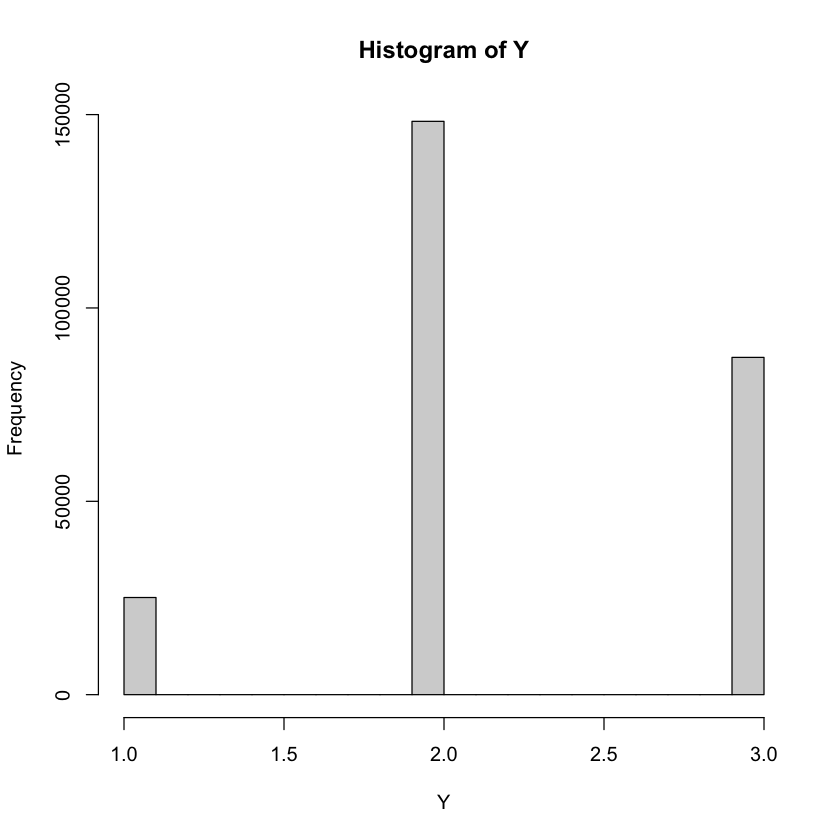

In [132]:
hist(Y)

Correlation with the output

In [243]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:n) {
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_err[nb_features,i] <- mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 0.3302  ; std dev= 0.0022" 
 [2] "#Features:  2  ; CV error= 0.3199  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3174  ; std dev= 0.0019" 
 [4] "#Features:  4  ; CV error= 0.3169  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3161  ; std dev= 0.0018" 
 [6] "#Features:  6  ; CV error= 0.3146  ; std dev= 0.0019" 
 [7] "#Features:  7  ; CV error= 0.3146  ; std dev= 0.0018" 
 [8] "#Features:  8  ; CV error= 0.3138  ; std dev= 0.0018" 
 [9] "#Features:  9  ; CV error= 0.3122  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3119  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3112  ; std dev= 0.0019"
[12] "#Features:  12  ; CV error= 0.3112  ; std dev= 0.0019"
[13] "#Features:  13  ; CV error= 0.3111  ; std dev= 0.0019"
[14] "#Features:  14  ; CV error= 0.311  ; std dev= 0.0019" 
[15] "#Features:  15  ; CV error= 0.311  ; std dev= 0.0019" 
[16] "#Features:  16  ; CV error= 0.3106  ; std dev= 0.0016"
[17] "#Features:  17  ; 

In [244]:
NuF1 <- correlation_ranking_idx
NaF1 <- colnames(X)[correlation_ranking_idx]
NuF1
NaF1

[1] 32 37  8 12 16 34 39 15  5 33  4  6 20 21 53 35 19  1 13  9 18 14 52 10  7
[26] 43 40 46  2 41 17 55 22 45 44 36 38 28 30 29 31 11 50 24 51 23 26 25  3 48
[51] 42 54 49 27 47

[1] "foundation_typer"                      
 [2] "ground_floor_typev"                    
 [3] "has_superstructure_mud_mortar_stone"   
 [4] "has_superstructure_cement_mortar_brick"
 [5] "has_superstructure_rc_engineered"      
 [6] "foundation_typew"                      
 [7] "other_floor_typeq"                     
 [8] "has_superstructure_rc_non_engineered"  
 [9] "age"                                   
[10] "foundation_typeu"                      
[11] "count_floors_pre_eq"                   
[12] "area_percentage"                       
[13] "has_secondary_use_hotel"               
[14] "has_secondary_use_rental"              
[15] "legal_ownership_statusa"               
[16] "roof_typen"                            
[17] "has_secondary_use"                     
[18] "geo_level_1_id"                        
[19] "has_superstructure_timber"             
[20] "has_superstructure_stone_flag"         
[21] "count_families"                        
[22] "has_superstructure_bamboo"             
[23] "plan_configurationu"                   
[24] "has_superstructure_cement_mortar_stone"
[25] "has_superstructure_adobe_mud"          
[26] "positiont"                             
[27] "other_floor_typex"                     
[28] "plan_configurationd"                   
[29] "geo_level_2_id"                        
[30] "positionj"                             
[31] "has_superstructure_other"              
[32] "legal_ownership_statusw"               
[33] "has_secondary_use_institution"         
[34] "plan_configurationc"                   
[35] "plan_configurationa"                   
[36] "ground_floor_typem"                    
[37] "ground_floor_typez"                    
[38] "has_secondary_use_other"               
[39] "land_surface_conditiont"               
[40] "land_surface_conditiono"               
[41] "foundation_typeh"                      
[42] "has_superstructure_mud_mortar_brick"   
[43] "plan_configurationo"                   
[44] "has_secondary_use_industry"            
[45] "plan_configurations"                   
[46] "has_secondary_use_school"              
[47] "has_secondary_use_gov_office"          
[48] "has_secondary_use_health_post"         
[49] "geo_level_3_id"                        
[50] "plan_configurationm"                   
[51] "positiono"                             
[52] "legal_ownership_statusr"               
[53] "plan_configurationn"                   
[54] "has_secondary_use_use_police"          
[55] "plan_configurationf"

mRMR

In [28]:
CV_folds <- 10

size_CV <-floor(N/CV_folds)

CV_err<-matrix(0,nrow=n,ncol=CV_folds)

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X[idx_ts,]  
    Y_ts<-Y[idx_ts]  
     
    idx_tr<-setdiff(1:N,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X[idx_tr,]
    Y_tr<-Y[idx_tr]                          
    
    # Computing the correlation between input variables and output variable on the training set
    correlation<-abs(cor(X_tr,Y_tr))
    
    # Initialization : No variables are selected and all the variables are candidates
    selected<-c()
    candidates<-1:n
    
    #mRMR ranks the variables by taking account not only the correlation with the output, but also by avoiding redudant variables
    for (j in 1:n) {
        redundancy_score<-numeric(length(candidates))
        
        if (length(selected)>0) {
            # Compute the correlation between the selected variables and the candidates on the training set
            cor_selected_candidates<-cor(X_tr[,selected,drop=F],X_tr[,candidates,drop=F])
            # Compute the mean correlation for each candidate variable, across the selected variables
            redundancy_score<-apply(cor_selected_candidates,2,mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score<-correlation[candidates]-redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current<-candidates[which.max(mRMR_score)]
        selected<-c(selected,selected_current)
        
        # Remove the selected variables from the candidates
        candidates<-setdiff(candidates,selected_current)
    }
    
    ranking <- selected
     
    for (nb_features in 1:n) {
        # Create a dataset including only the first nb_features selected variables
        DS<-cbind(X_tr[,ranking[1:nb_features],drop=F],damage_grade=Y_tr)
        
        # Model fit (using lm function)
        model<- lm(damage_grade~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,ranking[1:nb_features],drop=F])
        
        # Cross-validation error = MSE
        CV_err[nb_features,i]<-mean((Y_hat_ts-Y_ts)^2)
    }
}  

print(paste("#Features: ",c(1:n)," ; CV error=",round(apply(CV_err,1,mean),digits=4), " ; std dev=",round(apply(CV_err,1,sd),digits=4)))

 [1] "#Features:  1  ; CV error= 0.3302  ; std dev= 0.0022" 
 [2] "#Features:  2  ; CV error= 0.3199  ; std dev= 0.0019" 
 [3] "#Features:  3  ; CV error= 0.3189  ; std dev= 0.002"  
 [4] "#Features:  4  ; CV error= 0.3166  ; std dev= 0.0019" 
 [5] "#Features:  5  ; CV error= 0.3159  ; std dev= 0.002"  
 [6] "#Features:  6  ; CV error= 0.3142  ; std dev= 0.002"  
 [7] "#Features:  7  ; CV error= 0.313  ; std dev= 0.0019"  
 [8] "#Features:  8  ; CV error= 0.3129  ; std dev= 0.0019" 
 [9] "#Features:  9  ; CV error= 0.3122  ; std dev= 0.0018" 
[10] "#Features:  10  ; CV error= 0.3119  ; std dev= 0.0018"
[11] "#Features:  11  ; CV error= 0.3112  ; std dev= 0.0017"
[12] "#Features:  12  ; CV error= 0.3106  ; std dev= 0.0018"
[13] "#Features:  13  ; CV error= 0.3106  ; std dev= 0.0018"
[14] "#Features:  14  ; CV error= 0.3104  ; std dev= 0.0018"
[15] "#Features:  15  ; CV error= 0.3095  ; std dev= 0.0017"
[16] "#Features:  16  ; CV error= 0.3095  ; std dev= 0.0017"
[17] "#Features:  17  ; 

In [29]:
NuF2 <- selected
NaF2 <- colnames(X)[selected]
NuF2
NaF2

[1] 32 37 34  8 12  5 16 39 15 33 35  4  6 53 13 20  9 21 18  7  1 52 46  2 40
[26] 10 14 43 19 55 45 44 22 17 30 29 36 38 41 50 51 31 28 24 23 26  3 25 48 49
[51] 54 27 11 47 42

[1] "foundation_typer"                      
 [2] "ground_floor_typev"                    
 [3] "foundation_typew"                      
 [4] "has_superstructure_mud_mortar_stone"   
 [5] "has_superstructure_cement_mortar_brick"
 [6] "age"                                   
 [7] "has_superstructure_rc_engineered"      
 [8] "other_floor_typeq"                     
 [9] "has_superstructure_rc_non_engineered"  
[10] "foundation_typeu"                      
[11] "roof_typen"                            
[12] "count_floors_pre_eq"                   
[13] "area_percentage"                       
[14] "legal_ownership_statusa"               
[15] "has_superstructure_timber"             
[16] "has_secondary_use_hotel"               
[17] "has_superstructure_stone_flag"         
[18] "has_secondary_use_rental"              
[19] "count_families"                        
[20] "has_superstructure_adobe_mud"          
[21] "geo_level_1_id"                        
[22] "plan_configurationu"                   
[23] "plan_configurationd"                   
[24] "geo_level_2_id"                        
[25] "other_floor_typex"                     
[26] "has_superstructure_cement_mortar_stone"
[27] "has_superstructure_bamboo"             
[28] "positiont"                             
[29] "has_secondary_use"                     
[30] "legal_ownership_statusw"               
[31] "plan_configurationc"                   
[32] "plan_configurationa"                   
[33] "has_secondary_use_institution"         
[34] "has_superstructure_other"              
[35] "land_surface_conditiont"               
[36] "land_surface_conditiono"               
[37] "ground_floor_typem"                    
[38] "ground_floor_typez"                    
[39] "positionj"                             
[40] "plan_configurationo"                   
[41] "plan_configurations"                   
[42] "foundation_typeh"                      
[43] "has_secondary_use_other"               
[44] "has_secondary_use_industry"            
[45] "has_secondary_use_school"              
[46] "has_secondary_use_gov_office"          
[47] "geo_level_3_id"                        
[48] "has_secondary_use_health_post"         
[49] "plan_configurationm"                   
[50] "plan_configurationn"                   
[51] "legal_ownership_statusr"               
[52] "has_secondary_use_use_police"          
[53] "has_superstructure_mud_mortar_brick"   
[54] "plan_configurationf"                   
[55] "positiono"

Here the feature selection of the 2 methods shows more or less similar results even if the MRMR method seems a little bit better probably thanks to its function of regulating the concern of the rendering variables so we decided to choose the latter for the continuation of our tasks 

In [30]:
NaF2 <- 34
selected_features <- ranking[1:NaF2] 
New_Train <- trainCleanedD[, selected_features, drop = FALSE]
New_Train <- cbind(New_Train, damage_grade = Y)


In [31]:
NaF2 <- 34
selected_features <- ranking[1:NaF2] 
New_TrainT <- trainCleanedDT[, selected_features, drop = FALSE]


In [250]:
head(New_Train)

,foundation_typer,ground_floor_typev,foundation_typew,has_superstructure_mud_mortar_stone,has_superstructure_cement_mortar_brick,age,has_superstructure_rc_engineered,other_floor_typeq,has_superstructure_rc_non_engineered,foundation_typeu,...,has_superstructure_cement_mortar_stone,has_superstructure_bamboo,positiont,has_secondary_use,legal_ownership_statusw,plan_configurationc,plan_configurationa,has_secondary_use_institution,has_superstructure_other,damage_grade
,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,...,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,0,0,1,0,30,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
2,1,0,0,1,0,10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2
3,1,0,0,1,0,10,0,0,0,0,...,0,0,1,0,0,0,0,0,0,3
4,1,0,0,1,0,10,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
5,1,0,0,0,0,30,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,1,0,0,1,0,10,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2


In [ ]:
X<-New_Train[,setdiff(colnames(New_Train),"damage_grade")]
Y<-New_Train[,"damage_grade"]


N <-nrow(X)
n <-ncol(X)

## QUESTION 2

In [32]:
# from https://pastebin.com/b6WufBNq

ConfusionMatrix <- function(y_pred, y_true) {
  Confusion_Mat <- table(y_true, y_pred)
  return(Confusion_Mat)
}
 
ConfusionDF <- function(y_pred, y_true) {
  Confusion_DF <- transform(as.data.frame(ConfusionMatrix(y_pred, y_true)),
                            y_true = as.character(y_true),
                            y_pred = as.character(y_pred),
                            Freq = as.integer(Freq))
  return(Confusion_DF)
}
 
Precision_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FP <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # it may happen that a label is never predicted (missing from y_pred) but exists in y_true
    # in this case ConfusionDF will not have these lines and thus the simplified code crashes
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]))
   
    # workaround:
    # i don't want to change ConfusionDF since i don't know if the current behaviour is a feature or a bug.
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
   
    tmp <- Confusion_DF[which(Confusion_DF$y_true!=positive & Confusion_DF$y_pred==positive), "Freq"]
    FP[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Precision_micro <- sum(TP) / (sum(TP) + sum(FP))
  return(Precision_micro)
}
 
Recall_micro <- function(y_true, y_pred, labels = NULL) {
  Confusion_DF <- ConfusionDF(y_pred, y_true)
 
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred))
  # this is not bulletproof since there might be labels missing (in strange cases)
  # in strange cases where they existed in training set but are missing from test ground truth and predictions.
 
  TP <- c()
  FN <- c()
  for (i in c(1:length(labels))) {
    positive <- labels[i]
   
    # short version, comment out due to bug or feature of Confusion_DF
    # TP[i] <- as.integer(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"])
    # FP[i] <- as.integer(sum(Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]))
   
    # workaround:
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred==positive), "Freq"]
    TP[i] <- if (length(tmp)==0) 0 else as.integer(tmp)
 
    tmp <- Confusion_DF[which(Confusion_DF$y_true==positive & Confusion_DF$y_pred!=positive), "Freq"]
    FN[i] <- if (length(tmp)==0) 0 else as.integer(sum(tmp))
  }
  Recall_micro <- sum(TP) / (sum(TP) + sum(FN))
  return(Recall_micro)
}
 
F1_Score_micro <- function(y_true, y_pred, labels = NULL) {
  if (is.null(labels) == TRUE) labels <- unique(c(y_true, y_pred)) # possible problems if labels are missing from y_*
  Precision <- Precision_micro(y_true, y_pred, labels)
  Recall <- Recall_micro(y_true, y_pred, labels)
  F1_Score_micro <- 2 * (Precision * Recall) / (Precision + Recall)
  return(F1_Score_micro)
}

MODEL 1 : Decision Tree

In [290]:
set.seed(10)

In [292]:
DTM <- New_Train

[1] "Training Set Size :  156360 Test set Size :  104241"


,model.variable.importance
,<dbl>
geo_level_1_id,8175.22368
foundation_typer,3411.24049
foundation_typew,1246.04175
foundation_typeu,1177.80318
ground_floor_typev,1017.00657
has_superstructure_cement_mortar_brick,636.42758
geo_level_2_id,377.22388
has_superstructure_rc_engineered,329.12338
has_superstructure_timber,319.46450


[1] "F1 Score: 0.607937375888566"
[1] "Misclassification_rate On Damage Grade Prediction =  0.392062624111434"
[1] "Accuracy On Damage Grade Prediction =  0.607937375888566"


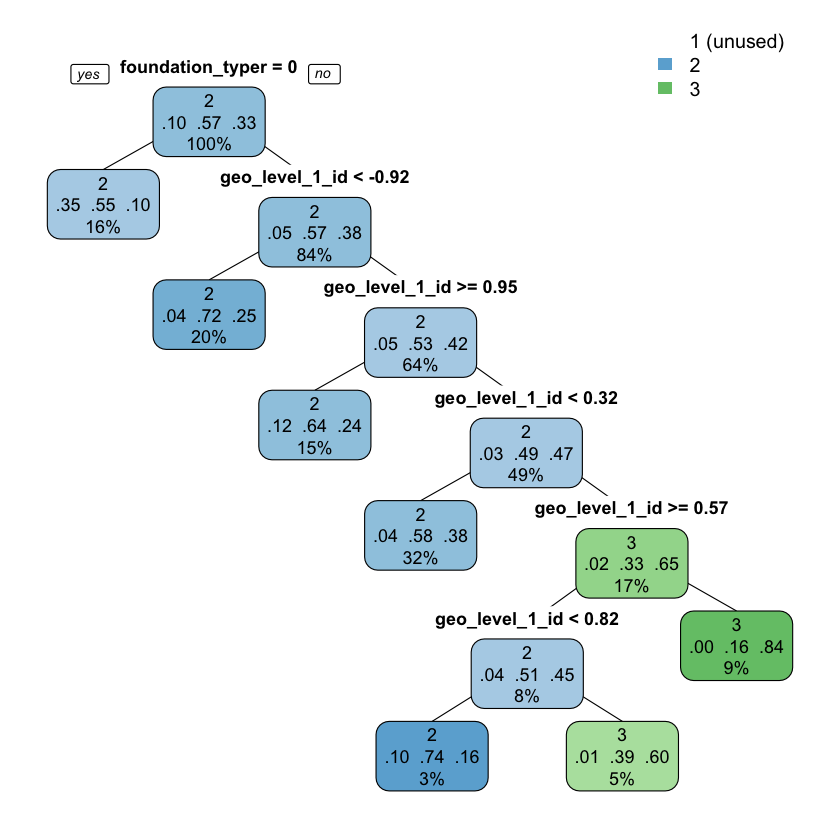

In [291]:
shuffled_index <- sample(1:nrow(DTM))
train_data_idx <- sample(1:nrow(DTM), floor(0.6 * nrow(DTM)))
train_data <- DTM[train_data_idx, ]
test_data <- DTM[-train_data_idx, ]
print(paste("Training Set Size : ",nrow(train_data) ,"Test set Size : ",nrow(test_data) ))
model <- rpart(damage_grade ~ . , method="class", data=train_data)
data.frame(model$variable.importance)
rpart.plot(model, type=1 , fallen.leaves = F ,cex =0.9)
Y_pred_probs <- predict(model, test_data[,-ncol(test_data)], type = "prob")
Y <- test_data[,ncol(test_data)]
Y_pred <- ifelse(Y_pred_probs[,1] > 0.3, "1", 
            ifelse(Y_pred_probs[,2] > 0.5, "2", "3"))
confusion_matrix <- table(Y_pred, Y)
Y_pred <- as.factor(Y_pred)
Y <- as.factor(Y)
f1_score <- F1_Score_micro(Y, Y_pred)
print(paste("F1 Score:", f1_score))
accuracy = sum(diag(confusion_matrix))/sum(confusion_matrix)
misclassification_rate = 1 - accuracy
print(paste("Misclassification_rate On Damage Grade Prediction = " , misclassification_rate))
print(paste( "Accuracy On Damage Grade Prediction = " , accuracy))

MODEL 2 : Random Forest


In [33]:
install.packages("randomForest")
library("randomForest")


Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//RtmpQXcQKs/downloaded_packages


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attachement du package : 'randomForest'


L'objet suivant est masqu'e depuis 'package:dplyr':

    combine


L'objet suivant est masqu'e depuis 'package:ggplot2':

    margin




In [34]:
set.seed(11)

In [352]:
RFM <- New_Train

[1] 0.6944526
                                       MeanDecreaseGini
foundation_typer                             1756.10325
ground_floor_typev                           1432.68168
foundation_typew                              414.78698
has_superstructure_mud_mortar_stone          1364.51789
has_superstructure_cement_mortar_brick        787.38762
age                                          2732.08867
has_superstructure_rc_engineered              391.46779
other_floor_typeq                             643.48546
has_superstructure_rc_non_engineered          392.86554
foundation_typeu                              287.83407
roof_typen                                    712.13320
count_floors_pre_eq                           481.57076
area_percentage                              2828.32755
legal_ownership_statusa                       249.90562
has_superstructure_timber                     644.31798
has_secondary_use_hotel                       253.93180
has_superstructure_stone_flag     

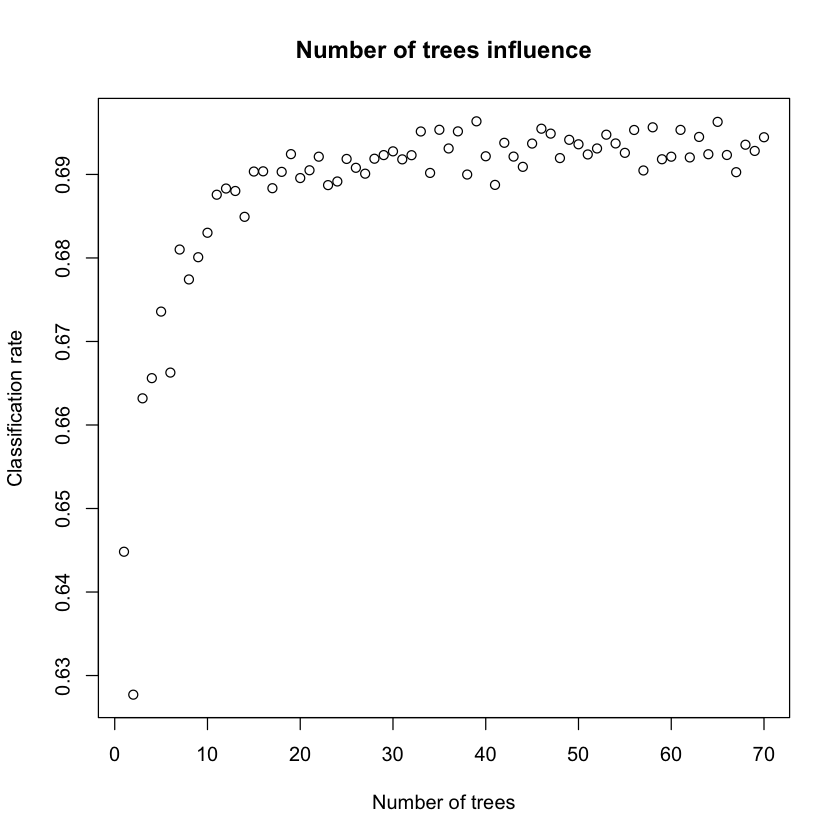

[1] "F1 Score: 0.69445261636459"


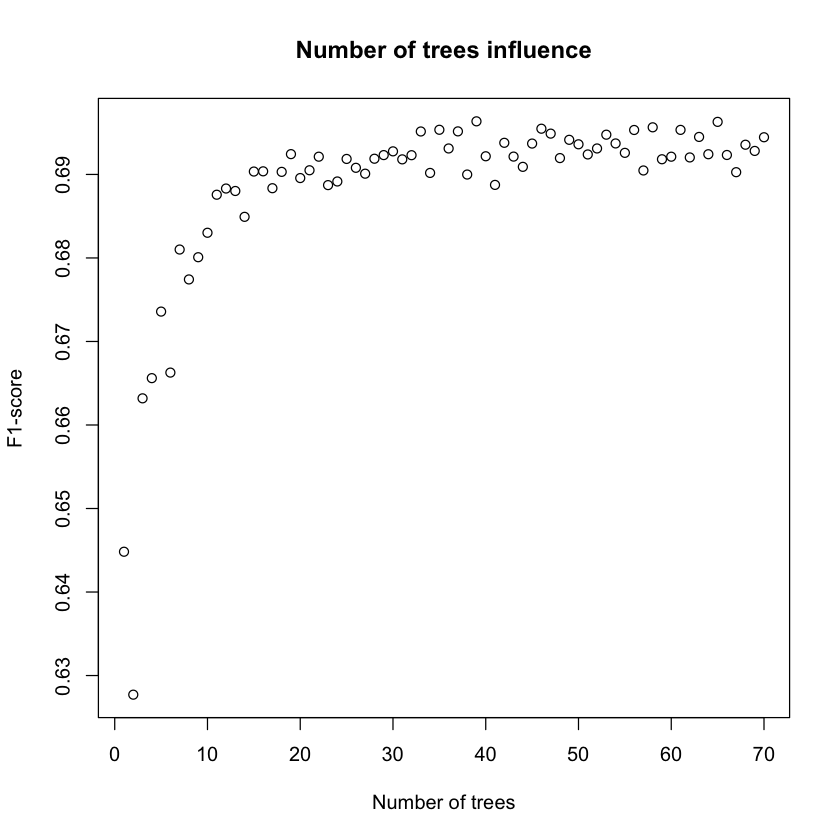

In [354]:
n_trees <- 70
accuracy_vec <- rep(0, n_trees)
f1_score_vec <- rep(0, n_trees)

class_weights <- table(RFM$damage_grade) / nrow(RFM)  # Computation of class weights

for (i in 1:n_trees) {
  # Creation of training and test sets
  train_data_idx <- sample(1:nrow(RFM), floor(0.7 * nrow(RFM)))
  train_data <- RFM[train_data_idx, ]
  test_data <- RFM[-train_data_idx, ]
  
  # Random forest model
  model <- randomForest(
    x = train_data[, -which(names(train_data) == "damage_grade")],
    y = as.factor(train_data$damage_grade),
    ntree = i,
    classwt = class_weights
  )
  
  # Predict part
  predictions <- predict(model, newdata = test_data[, -which(names(test_data) == "damage_grade")])
  
  # Accuracy
  correct_predictions <- sum(predictions == test_data$damage_grade)
  accuracy <- correct_predictions / nrow(test_data)
  accuracy_vec[i] <- accuracy
  
  # F1-score
  f1_score <- F1_Score_micro(test_data$damage_grade, predictions)  # Adjust positive class label if needed
  f1_score_vec[i] <- f1_score
}
var_importance <- importance(model)
print(accuracy)
print(var_importance)
plot(accuracy_vec, main = "Number of trees influence", xlab = "Number of trees", ylab = "Classification rate")
plot(f1_score_vec, main = "Number of trees influence", xlab = "Number of trees", ylab = "F1-score")
print(paste("F1 Score:", f1_score))


MODEL 3 : Rigde 

In [330]:
install.packages("glmnet")
library(ridge)

installation de la d'ependance 'RcppEigen'





Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//RtmpvzmHz1/downloaded_packages

Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//RtmpvzmHz1/downloaded_packages


Le chargement a n'ecessit'e le package : Matrix


Attachement du package : 'Matrix'


Les objets suivants sont masqu'es depuis 'package:tidyr':

    expand, pack, unpack


Loaded glmnet 4.1-7



In [324]:
set.seed(14)

In [ ]:
RRM <- New_Train

In [349]:
shuffled_index <- sample(1:nrow(RRM))
half_index <- floor(nrow(RRM) * 0.7)
train_data <- RRM[shuffled_index[1:half_index], ]
test_data <- RRM[shuffled_index[(half_index+1):nrow(RRM)], ]
print(paste("Training Set Size:", half_index, "Test Set Size:", nrow(RRM) - half_index))


model <- linearRidge(damage_grade ~ ., data = train_data, alpha = 0) 


# Predict test
Y_pred <- predict(model, newdata = test_data)

Y_pred <- as.factor(round(Y_pred))

Y <- test_data$damage_grade 
confusion_matrix <- table(Y, Y_pred)

# F1 Score
f1_score <- F1_Score_micro(Y, Y_pred)
print(paste("F1 Score:", f1_score))

accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
misclassification_rate <- 1 - accuracy
print(paste("Misclassification Rate on Damage Grade Prediction:", misclassification_rate))
print(paste("Accuracy on Damage Grade Prediction:", accuracy))
coefficients <- coef(model)
importance <- abs(coefficients)
importance <- importance[order(importance, decreasing = TRUE)]
print(importance)



[1] "Training Set Size: 182420 Test Set Size: 78181"
[1] "F1 Score: 0.573745539197503"
[1] "Misclassification Rate on Damage Grade Prediction: 0.426254460802497"
[1] "Accuracy on Damage Grade Prediction: 0.573745539197503"
                           (Intercept)       has_superstructure_rc_engineered 
                          1.9022189567                           0.2844242904 
                   plan_configurationa                       foundation_typer 
                          0.2708087833                           0.2606022806 
                    ground_floor_typev          has_superstructure_stone_flag 
                          0.2311994263                           0.2119682756 
                   plan_configurationu                    plan_configurationc 
                          0.1902476688                           0.1860522219 
   has_superstructure_mud_mortar_stone has_superstructure_cement_mortar_brick 
                          0.1687445198                           0

What can we conclude about these results ?

In our case the model that seems to be the most accurate is the random forest because it has the highest F1 score.
The Random forest presents several advantages in our context such as its robustness to outliers and noise, because by building several independent decision trees, it is less sensitive to outliers and random errors, which can contribute to better performance
Moreover, this model allows good results even when the classes are unbalanced.
Finally, this model is able to capture complex and non-linear relationships between the input variables and the target variable. In a multiclass classification problem, it can be crucial to take into account complex interactions between the different classes

## QUESTION 3

In order to respond to this question we choose the Graident Descent Tree. The Gradient Descent Tree is by definition an extension of the classical decision trees but uses in addition the gradient descent to optimize the predictions. In our multiclass case, each node of the tree represents a region of the feature space associated with a class. During training, the algorithm adjusts the feature weights using gradient descent to minimize the overall loss. Predictions are obtained by traversing the tree until a leaf is reached and assigning the majority class. This results in a learning model capable of predicting classes in a multiclass problem.

In [297]:
install.packages("xgboost")
library(xgboost)


Les packages binaires t'el'echarg'es sont dans
	/var/folders/7j/n3q0pxkj3fvc8pf6rq5cpq680000gn/T//RtmpvzmHz1/downloaded_packages


In [298]:
set.seed(12)

In [303]:
# Creation of training and test sets
shuffled_index <- sample(1:nrow(New_Train))

# We indicate the ration between the test and training set
half_index <- floor(nrow(New_Train)*0.7)

# Creation of training and test sets
train_data <- New_Train[shuffled_index[1:half_index], ]
test_data <- New_Train[shuffled_index[(half_index+1):nrow(New_Train)], ]

print(paste("Training Set Size:", half_index, "Test Set Size:", nrow(New_Train)-half_index))

# Gradient boosting tree model (XGBoost) we choose 50 because we have a good resulat with this paramter
model <- xgboost(data = as.matrix(train_data[, -ncol(train_data)]),
                 label = train_data[, ncol(train_data)],
                 nrounds = 50,
                 objective = "multi:softmax",
                 num_class = 4)

# Varaibles importance
xgb.importance(feature_names = colnames(train_data[, -ncol(train_data)]), model = model)

# Predict step
Y_pred <- predict(model, as.matrix(test_data[, -ncol(test_data)]))

Y <- test_data[, ncol(test_data)]

# confusion matrix
confusion_matrix <- table(Y, Y_pred)

# F1 score
library(MLmetrics)
f1_score <- F1_Score_micro(Y, Y_pred)
print(paste("F1 Score:", f1_score))

accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
misclassification_rate <- 1 - accuracy
print(paste("Misclassification Rate on Damage Grade Prediction:", misclassification_rate))
print(paste("Accuracy on Damage Grade Prediction:", accuracy))



[1] "Training Set Size: 182420 Test Set Size: 78181"
[1]	train-mlogloss:1.167855 
[2]	train-mlogloss:1.035389 
[3]	train-mlogloss:0.947894 
[4]	train-mlogloss:0.885902 
[5]	train-mlogloss:0.841385 
[6]	train-mlogloss:0.808377 
[7]	train-mlogloss:0.783592 
[8]	train-mlogloss:0.762479 
[9]	train-mlogloss:0.746266 
[10]	train-mlogloss:0.732785 
[11]	train-mlogloss:0.722099 
[12]	train-mlogloss:0.712591 
[13]	train-mlogloss:0.704453 
[14]	train-mlogloss:0.697779 
[15]	train-mlogloss:0.691664 
[16]	train-mlogloss:0.686832 
[17]	train-mlogloss:0.680211 
[18]	train-mlogloss:0.675899 
[19]	train-mlogloss:0.672302 
[20]	train-mlogloss:0.668313 
[21]	train-mlogloss:0.665116 
[22]	train-mlogloss:0.662625 
[23]	train-mlogloss:0.660252 
[24]	train-mlogloss:0.658265 
[25]	train-mlogloss:0.656386 
[26]	train-mlogloss:0.654000 
[27]	train-mlogloss:0.652413 
[28]	train-mlogloss:0.650602 
[29]	train-mlogloss:0.648168 
[30]	train-mlogloss:0.646862 
[31]	train-mlogloss:0.644974 
[32]	train-mlogloss:0.6435

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
geo_level_1_id,4.262851e-01,2.361700e-01,0.1801043396
foundation_typer,1.639412e-01,1.594855e-02,0.0125681764
geo_level_2_id,1.422806e-01,3.561932e-01,0.3013990989
has_superstructure_mud_mortar_stone,4.853051e-02,2.795519e-02,0.0256106237
ground_floor_typev,4.517243e-02,2.054931e-02,0.0107896609
age,4.250560e-02,5.955765e-02,0.0898743182
has_superstructure_cement_mortar_brick,1.799307e-02,2.023005e-02,0.0131610149
other_floor_typeq,1.707885e-02,2.237501e-02,0.0190894000
area_percentage,1.259486e-02,4.038690e-02,0.0918899692


[1] "F1 Score: 0.711042324861539"
[1] "Misclassification Rate on Damage Grade Prediction: 0.288957675138461"
[1] "Accuracy on Damage Grade Prediction: 0.711042324861539"


The Gradient Descent Tree seems to show good performance, like the random forest it has a good ability to capture non-linear relationships, good handling to class imbalance and robustness to outliers.

Update: After publishing on DrivenData their results between the random forest and GDT are almost identical probably because of their cleanliness quoted above that are common.

## QUESTION 4 

We use the gradient descent tree

In [59]:
P <- predict(model, as.matrix(New_TrainT[, -ncol(New_Train)]))
result_df  <- data.frame(building_id = test$building_id, damage_grade = P)
write.csv(result_df, "result.csv", row.names = FALSE)

## QUESTION 5

The objective here is therefore to evaluate the relevance of the variables in a classification model using entropy. Conditional entropy is a measure of the uncertainty associated with a random variable conditional on another variable.

For this we use a Random Forest classifier to predict the target variable "damage_grade". The first step is to train the Random Forest model on the full set of variables in the training dataset.

Next, we compute the conditional entropy H(y|X), which measures the uncertainty of the target variable "damage_grade" given the set of predictor variables X. The conditional entropy is computed from the probabilities predicted by the model on the training data.

Using this new model, we seek to calculate the conditional entropy H(y|X-i).

The relevance of each variable is then evaluated by computing the difference between the conditional entropy H(y|X-i) and the conditional entropy H(y|X). A larger difference indicates that the variable has a greater contribution to reducing uncertainty in the damage_grade prediction.

Finally, the variables are ranked according to their relevance, from most relevant to least relevant. This ranking allows us to identify the variables that have the greatest impact on the damage_grade prediction.



URGENT NOT GOOD SCRIPT I THINK IT'S NOT WORKING PLEASE I REALLY SORRY

Definition of the entropy function : 

In [52]:
entropy <- function(probabilities) {
  -sum(probabilities * log2(probabilities))
}

In [48]:
model <- randomForest(damage_grade ~ ., data = EnT)

In [47]:
EnT$damage_grade <- as.factor(EnT$damage_grade)

In [49]:

feature_importance <- importance(model)


relevance <- numeric()

In [46]:

shuffled_index <- sample(1:nrow(EnT))


half_index <- floor(nrow(EnT)*0.7)


train_data <- EnT[shuffled_index[1:half_index], ]
test_data <- EnT[shuffled_index[(half_index+1):nrow(EnT)], ]

In [53]:
probabilities <- predict(model, newdata = train_data, type = "prob")
entropy_X <- entropy(probabilities)

In [57]:
for (i in 1:(ncol(train_data) - 1)) {

  Xmi <- train_data[, -i]
  
 
  modelmi <- randomForest(formula = damage_grade ~ ., data = Xmi)
  
 
  probabilitiesmi <- predict(modelmi, newdata = Xmi, type = "prob")
  entropyXmi <- entropy(probabilitiesmi)
  
 
  pertinence_variable[i] <- entropyXmi - entropy_X
}

In [44]:
EnT <- New_Train

In [56]:
pertinence_variable <- numeric(ncol(train_data) - 1)